# Final Notebook

### Paula Brown
### Abby Swan

## Introduction

We decided to look for the best neighborhood for a child to grow up in. To do this, we looked at playgrounds and pools in Pittsburgh neighborhoods. We also anaylzed crime data in the city. We believe that the best neighborhood should have plenty of playgrounds and pools while the arrests are low.

## Metric

To deterimine the best Pittsburgh neighborhood to grow up in, we anaylized the top ten neighborhoods from each data set: pools, playgrounds and arrest incidences in Pittsburgh. Then we said the best neighborhoods were those that were in the top tier for both data sets.

## Data Set One: Pool Data

##### Paula Brown

The purpose is to determine the best neighborhood depending on pool data. Most kids like to swim so the neighborhood with the most pools would be the best to raise a child in. Moreover, in the data the type of pool is also given. Therefore, types of pools were given weight. It was using the sum of the weighted pools in the neighborhood that determined our conclusion for the best neighborhood. 

In [4]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import geopandas

Loading the data

In [2]:
data = pd.read_csv("PittsburghPools.csv")

# look at the first ten rows of the data
data.head(10)

,id,name,type,retired,water_source,capacity,image,neighborhood,council_district,ward,tract,public_works_division,pli_division,police_zone,fire_zone,latitude,longitude
0,899591542,Ammon,Pool,NaN,Pittsburgh Water and Sewer Authority,538000.0,https://tools.wprdc.org/images/pittsburgh/pool...,Bedford Dwellings,6,5,42003050900,3,5,2,2-5,40.448720,-79.978325
1,1003800828,Banksville,Pool,NaN,Pennsylvania American Water,166320.0,https://tools.wprdc.org/images/pittsburgh/pool...,Banksville,2,20,42003202300,5,20,6,4-9,40.414758,-80.040551
2,1688544652,Beechview Spray Park,Spray Park,NaN,Pennsylvania American Water,NaN,https://tools.wprdc.org/images/pittsburgh/pool...,Beechview,4,19,42003191600,5,19,6,4-28,40.414989,-80.019170
3,1533382756,Bloomfield,Pool,NaN,Pittsburgh Water and Sewer Authority,335000.0,https://tools.wprdc.org/images/pittsburgh/pool...,Bloomfield,7,8,42003080200,2,8,5,3-1,40.461989,-79.953310
4,1287441950,Burgwin Spray Park,Spray Park,NaN,Pittsburgh Water and Sewer Authority,NaN,https://tools.wprdc.org/images/pittsburgh/pool...,Hazelwood,5,15,42003562300,3,15,4,2-13,40.405065,-79.936896
5,168387727,Cowley Spray Park,Spray Park,NaN,Pittsburgh Water and Sewer Authority,NaN,https://tools.wprdc.org/images/pittsburgh/pool...,Troy Hill,1,24,42003240600,1,24,1,1-2,40.458739,-79.988366
6,1569871328,East Hills Spray Park,Spray Park,NaN,Wilkinsburg Penn,NaN,https://tools.wprdc.org/images/pittsburgh/pool...,East Hills,9,13,42003130600,2,13,5,3-19,40.453091,-79.871036
7,1475037865,Highland - Children,Pool,NaN,Pittsburgh Water and Sewer Authority,NaN,https://tools.wprdc.org/images/pittsburgh/pool...,Highland Park,7,11,42003980100,2,11,5,3-9,40.482011,-79.911280
8,5446687,Highland - Main,Pool,NaN,Pittsburgh Water and Sewer Authority,560242.0,https://tools.wprdc.org/images/pittsburgh/pool...,Highland Park,7,11,42003980100,2,11,5,3-9,40.482170,-79.910927
9,878134116,Homewood,Pool,NaN,Pittsburgh Water and Sewer Authority,171075.0,https://tools.wprdc.org/images/pittsburgh/pool...,Homewood South,9,13,42003130300,2,13,5,3-17,40.454310,-79.899891


This how many pools there are in each neighborhood total.

In [3]:
data['neighborhood'].value_counts()

South Side Flats            2
Highland Park               2
Bedford Dwellings           1
South Side Slopes           1
Westwood                    1
Polish Hill                 1
Beltzhoover                 1
Allegheny Center            1
Sheraden                    1
Squirrel Hill South         1
Perry North                 1
Mount Washington            1
Carrick                     1
Brookline                   1
Banksville                  1
Shadyside                   1
Lincoln Place               1
Greenfield                  1
Brighton Heights            1
Homewood South              1
East Hills                  1
Troy Hill                   1
Hazelwood                   1
Bloomfield                  1
Beechview                   1
Lincoln-Lemington-Belmar    1
Name: neighborhood, dtype: int64

South Side Flats and Highland Park have the most pools (they have two). However, this is really bland data with not alot of variation. If you notice up above when the first ten rows where listed, there was a collumn for the *type* of pool. The two types of pools are: 'Spray Park' and 'Pool'.

This data determines which neighborhood is the best for children, and I think it is safe to say that it is more likely for a child to have fun at a spray park vs a normal pool. Hence, the neighborhoods with the spray park will be given more weight (more importance) than a neighborhood without a spray park.

In [6]:
# make a new column called 'Weight'
data.loc[:,'Weight']=0
for index, row in data.iterrows():
    # do stuff with each row
    #if the type of pool is a pool then the weight is six
    data.loc[data['type']=='Pool', 'weight'] = 6
    #if the type of pool is a spray park then the weight is nine
    data.loc[data['type']=='Spray Park', 'weight'] = 9
data.head(10)

,id,name,type,retired,water_source,capacity,image,neighborhood,council_district,ward,tract,public_works_division,pli_division,police_zone,fire_zone,latitude,longitude,Weight,weight
0,899591542,Ammon,Pool,NaN,Pittsburgh Water and Sewer Authority,538000.0,https://tools.wprdc.org/images/pittsburgh/pool...,Bedford Dwellings,6,5,42003050900,3,5,2,2-5,40.448720,-79.978325,0,6.0
1,1003800828,Banksville,Pool,NaN,Pennsylvania American Water,166320.0,https://tools.wprdc.org/images/pittsburgh/pool...,Banksville,2,20,42003202300,5,20,6,4-9,40.414758,-80.040551,0,6.0
2,1688544652,Beechview Spray Park,Spray Park,NaN,Pennsylvania American Water,NaN,https://tools.wprdc.org/images/pittsburgh/pool...,Beechview,4,19,42003191600,5,19,6,4-28,40.414989,-80.019170,0,9.0
3,1533382756,Bloomfield,Pool,NaN,Pittsburgh Water and Sewer Authority,335000.0,https://tools.wprdc.org/images/pittsburgh/pool...,Bloomfield,7,8,42003080200,2,8,5,3-1,40.461989,-79.953310,0,6.0
4,1287441950,Burgwin Spray Park,Spray Park,NaN,Pittsburgh Water and Sewer Authority,NaN,https://tools.wprdc.org/images/pittsburgh/pool...,Hazelwood,5,15,42003562300,3,15,4,2-13,40.405065,-79.936896,0,9.0
5,168387727,Cowley Spray Park,Spray Park,NaN,Pittsburgh Water and Sewer Authority,NaN,https://tools.wprdc.org/images/pittsburgh/pool...,Troy Hill,1,24,42003240600,1,24,1,1-2,40.458739,-79.988366,0,9.0
6,1569871328,East Hills Spray Park,Spray Park,NaN,Wilkinsburg Penn,NaN,https://tools.wprdc.org/images/pittsburgh/pool...,East Hills,9,13,42003130600,2,13,5,3-19,40.453091,-79.871036,0,9.0
7,1475037865,Highland - Children,Pool,NaN,Pittsburgh Water and Sewer Authority,NaN,https://tools.wprdc.org/images/pittsburgh/pool...,Highland Park,7,11,42003980100,2,11,5,3-9,40.482011,-79.911280,0,6.0
8,5446687,Highland - Main,Pool,NaN,Pittsburgh Water and Sewer Authority,560242.0,https://tools.wprdc.org/images/pittsburgh/pool...,Highland Park,7,11,42003980100,2,11,5,3-9,40.482170,-79.910927,0,6.0
9,878134116,Homewood,Pool,NaN,Pittsburgh Water and Sewer Authority,171075.0,https://tools.wprdc.org/images/pittsburgh/pool...,Homewood South,9,13,42003130300,2,13,5,3-17,40.454310,-79.899891,0,6.0


Let's see each neighborhoods weighted pool sum.

In [7]:
poolsNum = data.groupby("neighborhood").sum()['weight']
poolsNum.sort_values(ascending=False)

neighborhood
South Side Flats            12.0
Highland Park               12.0
Troy Hill                    9.0
Beechview                    9.0
Beltzhoover                  9.0
South Side Slopes            9.0
East Hills                   9.0
Shadyside                    9.0
Hazelwood                    9.0
Lincoln-Lemington-Belmar     9.0
Allegheny Center             6.0
Mount Washington             6.0
Squirrel Hill South          6.0
Sheraden                     6.0
Polish Hill                  6.0
Perry North                  6.0
Homewood South               6.0
Lincoln Place                6.0
Banksville                   6.0
Greenfield                   6.0
Carrick                      6.0
Brookline                    6.0
Brighton Heights             6.0
Bloomfield                   6.0
Bedford Dwellings            6.0
Westwood                     6.0
Name: weight, dtype: float64

Analyzing the data above, it is clear that Highland Park and South Side Flats have the largest weighted sum of 12. Since type 'Pool' was given a weight of 6 and type 'Spray Park' was given a weight of 9, to achieve the number 12, both neighborhoods must have two pools of type 'pool'. If the neighborhood has a weighted sum of 9, then it has a singular pool of type 'Spray Park'. Moreover, if the neighborhood has a weighted sum of 6, then it has a singular pool of type 'pool'.

##### Let's plot the data now!

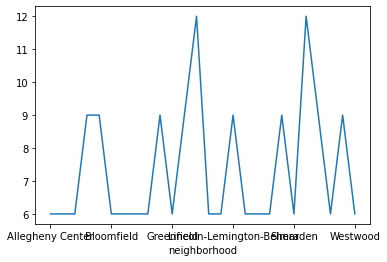

In [8]:
poolsNum.plot()

This graph above does not tell us alot because it is crowded. It is also really ugly. Therefore, let's make a bar graph!

Text(0, 0.5, 'Number of Pools')

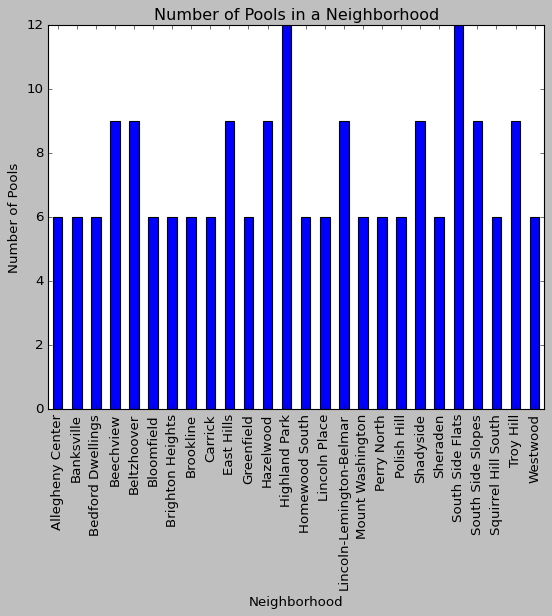

In [9]:
plt.style.use('classic')
poolsNum.plot.bar(title='Number of Pools in a Neighborhood')
#label axis
plt.xlabel("Neighborhood")
plt.ylabel("Number of Pools")

So now the weighted sum of pools that a neighborhood has can be clearly seen. I can be observed that Highland Park and South Side Flats have two pools of type "pool" because their weighted sum is 12.
### Now it is time for GeoPandas

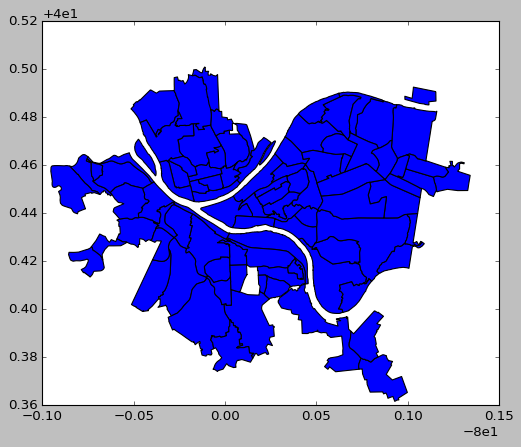

In [10]:
#neighborhoods = geopandas.read_file("Neighborhoods")
neighborhoods = geopandas.read_file("Neighborhoods/Neighborhoods_.shx")
neighborhoods.plot() # plot the geopandas dataframe

In [11]:
# do the merge
pools_map = neighborhoods.merge(poolsNum, how='left', left_on='hood', right_on='neighborhood')
# look at the head to confirm it merged correctly
pools_map[['hood','weight','geometry']].head()

,hood,weight,geometry
0,Central Oakland,NaN,"POLYGON ((-79.95304 40.44203, -79.95302 40.442..."
1,North Oakland,NaN,"POLYGON ((-79.95455 40.45882, -79.95427 40.458..."
2,West Oakland,NaN,"POLYGON ((-79.96230 40.44294, -79.96220 40.442..."
3,Crawford-Roberts,NaN,"POLYGON ((-79.98275 40.44641, -79.98273 40.446..."
4,Strip District,NaN,"POLYGON ((-79.97494 40.45629, -79.97484 40.456..."


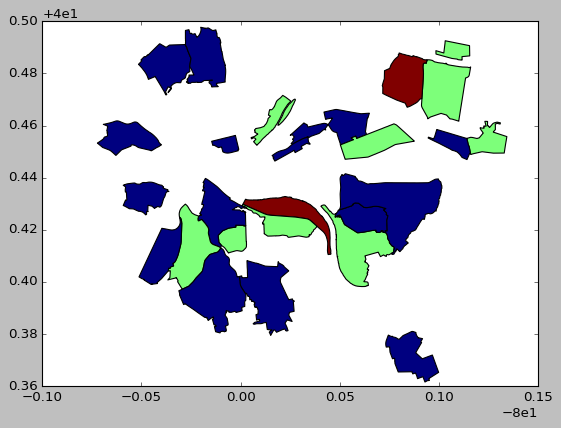

In [12]:
pools_map.plot(column='weight')

Unfortunentally, all the neighborhoods without data are missing! Also, there is no key for what a certain colour represents. Hence, the graph must be formatted.

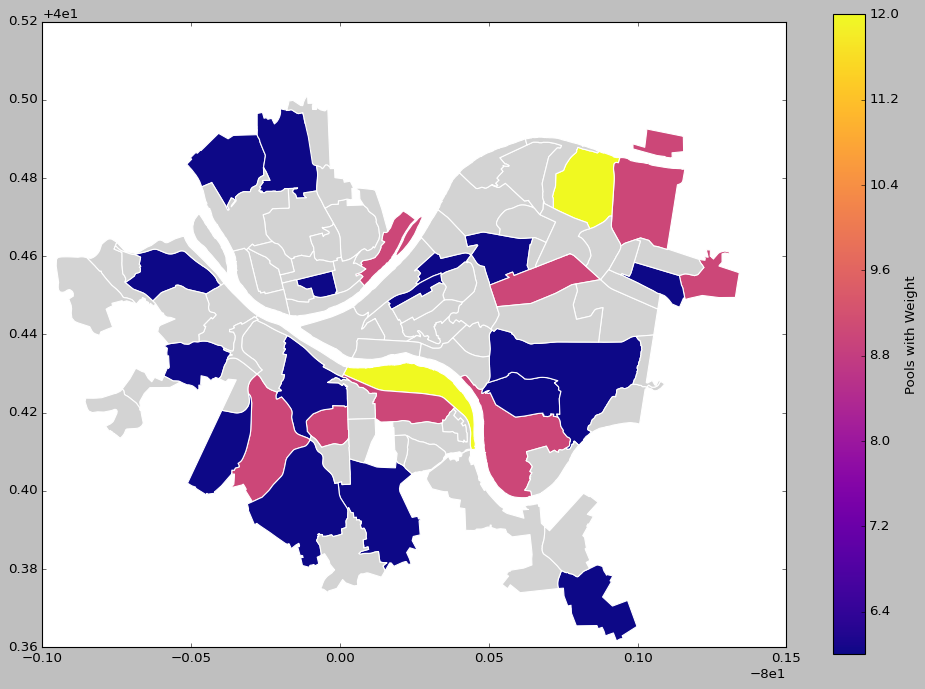

In [13]:
pools_map.plot(column='weight', # set the data to be used for coloring
               cmap='plasma',              # choose a color palette
               edgecolor="white",        # outline the districts in white
               legend=True,              # show the legend
               legend_kwds={'label': "Pools with Weight"}, # label the legend
               figsize=(15, 10),         # set the size
               missing_kwds={"color": "lightgrey"} # set disctricts with no data to gray
               )

Now the graph makes a lot more sense. Due to the legend, it is clear that yellow means the most pools with a weighted sum of 12. Above, it was discussed that '12' means that there are two pools of type 'pool' in the neighborhood. The pink colour represents a neighborhood with one pool of type 'spray park' and the blue colour represents a neighborhood with one pool of type 'pool'. The gray neighborhoods do not have a pool in the data set.
Hence, I choose Highland Park or the South Side Flats to be the best neighborhood because they have two pools. Moreover, both of these neighborhoods are borded by neighborhoods that have spray parks.

## Data Set Two - Playgrounds

Abby Swan

This data set will help to determine the best neighborhood in Pittsburgh to raise a child by revealing which neighborhood has the most playgrounds within its borders. Within the playground data set, there was no indication of what types of play-areas were at each playground. Because of this, the playgrounds are not given any weight, and the neighborhood supremacy in terms of playgrounds is based off of simply quantity of playgrounds.

To start, I imported in all the possible packages I would need to use

In [177]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import geopandas

I loaded in the data from the playgrounds csv file and printed a sample of the data

In [178]:
data = pd.read_csv("Playgrounds.csv")

data.sample(5)

,id,name,type,maintenance_responsibility,park,street,image,neighborhood,council_district,ward,tract,public_works_division,pli_division,police_zone,fire_zone,latitude,longitude
57,561282176,Leolyn Playground,NaN,Parks - Southern,Leolyn Park,LEOLYN ST,https://tools.wprdc.org/images/pittsburgh/play...,Carrick,4,29,42003290200,3,29,3,4-12,40.399263,-79.986056
112,1243066156,Warrington Playground,NaN,Parks - Southern,Warrington Park,E WARRINGTON AVE,https://tools.wprdc.org/images/pittsburgh/play...,Beltzhoover,3,18,42003562400,5,18,3,4-5,40.421306,-80.001238
85,698726686,Pauline Playground,NaN,Parks - Western,Pauline Park,PAULINE AVE,https://tools.wprdc.org/images/pittsburgh/play...,Beechview,4,19,42003192000,5,19,6,4-28,40.404719,-80.025795
86,1540689442,Paulson Playground,NaN,Parks - Eastern,Paulson Park,PAULSON AVE,https://tools.wprdc.org/images/pittsburgh/play...,Lincoln-Lemington-Belmar,9,12,42003120300,2,12,5,3-15,40.469026,-79.900381
20,130973977,Chartiers Playground,NaN,Parks - Western,Chartiers Park,CHARTIERS AVE,https://tools.wprdc.org/images/pittsburgh/play...,Windgap,2,28,42003563000,5,28,6,1-16,40.457028,-80.075011


Most playgrounds had an image of it attached in the dataframe which I thought was very interesting, some of them are pictured below. Most looked very similar, which was another reason I decided to not give any playgrounds more weight over another

![alt text](https://tools.wprdc.org/images/pittsburgh/playgrounds/Albert_Graham_Playground.jpg "Albert Graham Playground")

![alt text](https://tools.wprdc.org/images/pittsburgh/playgrounds/Mellon_Playground.jpg "Mellon Playground")

![alt text](https://tools.wprdc.org/images/pittsburgh/playgrounds/Alton_Playground.jpg "Alton Playground")

There was lots of information that would not have been helpful for this research, so cut those columns out

In [179]:
data.pop('id')
data.pop('type')
data.pop('maintenance_responsibility')
data.pop('council_district')
data.pop('ward')
data.pop('tract')
data.pop('public_works_division')
data.pop('pli_division')
data.pop('police_zone')
data.pop('fire_zone')

0      4-28
1       2-1
2      1-21
3      4-28
4       2-5
       ... 
120    4-23
121     3-5
122    4-16
123    3-10
124     1-5
Name: fire_zone, Length: 125, dtype: object

Printing a sample of the new data frame, with only the necesary information

In [180]:
data.head(5)

,name,park,street,image,neighborhood,latitude,longitude
0,Able Long Playground,Able Long Park,COAST AVE,https://tools.wprdc.org/images/pittsburgh/play...,Beechview,40.408365,-80.028445
1,Albert Graham Playground,Albert Turk Graham Park,FORESIDE PL,https://tools.wprdc.org/images/pittsburgh/play...,Crawford-Roberts,40.440519,-79.984137
2,Alpine Playground,Alpine Gardens Park,ALPINE AVE,https://tools.wprdc.org/images/pittsburgh/play...,Central Northside,40.457707,-80.012952
3,Alton Playground,Alton Park,ANDICK WAY,https://tools.wprdc.org/images/pittsburgh/play...,Beechview,40.414137,-80.021605
4,Ammon Playground,Ammon Park,MEMORY LN,https://tools.wprdc.org/images/pittsburgh/play...,Bedford Dwellings,40.449037,-79.978064


Graphing the neighborhoods based on their quanitity of playground

As you can see, there is already a clear winner, but let's clean up the data more

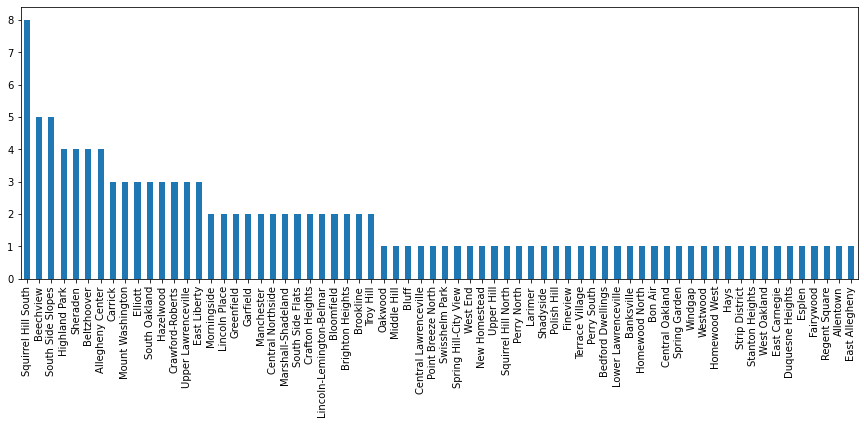

In [181]:
data['neighborhood'].value_counts().plot.bar(figsize=(15,5))

#### Cleaning Up the Data:

Turning the neighborhoods and their quantity or playgrounds into a dictionary

In [182]:
neighborhoods_dict = dict()

for row in data['neighborhood']:
    
    if row not in neighborhoods_dict:
        neighborhoods_dict[row] = 1
    else:
        neighborhoods_dict[row] = neighborhoods_dict[row] + 1

neighborhoods_dict

{'Beechview': 5,
 'Crawford-Roberts': 3,
 'Central Northside': 2,
 'Bedford Dwellings': 1,
 'South Side Slopes': 5,
 'South Side Flats': 2,
 'Lower Lawrenceville': 1,
 'Banksville': 1,
 'Homewood North': 1,
 'Bon Air': 1,
 'Central Oakland': 1,
 'Brighton Heights': 2,
 'Brookline': 2,
 'Hazelwood': 3,
 'Squirrel Hill South': 8,
 'Spring Garden': 1,
 'Lincoln-Lemington-Belmar': 2,
 'Windgap': 1,
 'Troy Hill': 2,
 'Westwood': 1,
 'Perry South': 1,
 'Homewood West': 1,
 'Allegheny Center': 4,
 'Strip District': 1,
 'Stanton Heights': 1,
 'Crafton Heights': 2,
 'West Oakland': 1,
 'East Carnegie': 1,
 'Duquesne Heights': 1,
 'East Liberty': 3,
 'Esplen': 1,
 'Fairywood': 1,
 'Highland Park': 4,
 'Upper Lawrenceville': 3,
 'Fineview': 1,
 'Regent Square': 1,
 'Garfield': 2,
 'Greenfield': 2,
 'South Oakland': 3,
 'Allentown': 1,
 'Hays': 1,
 'Elliott': 3,
 'Morningside': 2,
 'Terrace Village': 1,
 'Larimer': 1,
 'Carrick': 3,
 'Central Lawrenceville': 1,
 'Lincoln Place': 2,
 'Manchester': 

#### (Detour to create a data frame to graph later with geo pandas)

Turning the dictionary into a data set containing only the neighborhoods and their quantity of playgrounds, wich will be helpful for graphing this data onto a map later (method that turns dictionary to a data frame was not helpful as it used the keys as the row indexes)

In [183]:
# turning the keys (neighborhoods) into a list 
hoods_list = list() 

for key in neighborhoods_dict:
    hoods_list.append(key)
    

In [184]:
# turning the values (quantity of playgrounds) into a list 
quantity_list = list()

for key in neighborhoods_dict:
    quantity_list.append(neighborhoods_dict[key])
    

In [186]:
# creating a dataframe with the neighborhoods and quantities as columns
quantity_data = {'neighborhood':hoods_list,
        'quantity':quantity_list}
 
# Create DataFrame
pg_quantity = pd.DataFrame(quantity_data)

In [187]:
pg_quantity.head()

,neighborhood,quantity
0,Beechview,5
1,Crawford-Roberts,3
2,Central Northside,2
3,Bedford Dwellings,1
4,South Side Slopes,5


#### Continuing to clean up the data

Cutting the dictionary to only include neigbhorhoods with large amounts of playgrounds

In [99]:
cut_dict = neighborhoods_dict
count = 0
keys_list = list(cut_dict)

while count < len(keys_list):
    key = keys_list[count]
    
    if cut_dict[key] < 4:
        cut_dict.pop(key)

    count += 1


In [100]:
cut_dict

{'Beechview': 5,
 'South Side Slopes': 5,
 'Squirrel Hill South': 8,
 'Allegheny Center': 4,
 'Highland Park': 4,
 'Sheraden': 4,
 'Beltzhoover': 4}

Making a bar chart to visualize the top contenders for best neighborhood in terms of playgrounds, with Squirrel Hill South leading with 8 playgrounds

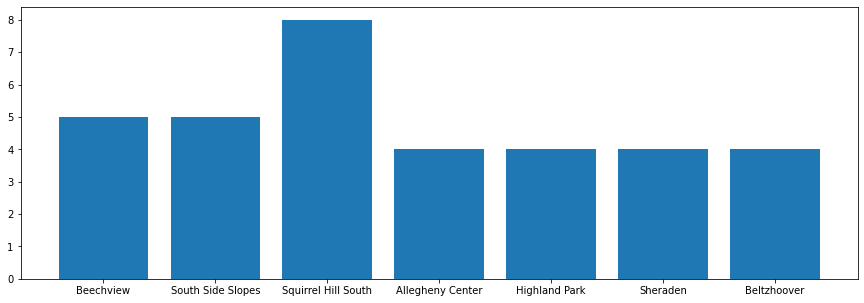

In [101]:
neighborhoods = list(cut_dict.keys())
playgrounds = list(cut_dict.values())
           
#plt.bar(neighborhoods, playgrounds)

plt.figure(figsize=(15, 5))
plt.bar(neighborhoods, playgrounds)
plt.show()

#### Geo Pandas!

Loading in the map of neighborhoods around Pittsburgh

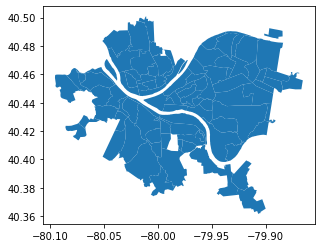

In [102]:
neighborhoods_map = geopandas.read_file("Neighborhoods_.shp")
neighborhoods_map.plot() # plot the geopandas dataframe

Merging the map with the data frame that contained only the neighborhoods and their corresponding quantity of playgrounds

In [188]:
playgrounds_map = neighborhoods_map.merge(pg_quantity, how='left', left_on='hood', right_on='neighborhood')
playgrounds_map[['hood','quantity','geometry']].head(10)

,hood,quantity,geometry
0,Chateau,NaN,"POLYGON ((-80.02999 40.45909, -80.02989 40.458..."
1,Summer Hill,NaN,"POLYGON ((-80.01078 40.49975, -80.01073 40.499..."
2,Northview Heights,NaN,"POLYGON ((-80.00327 40.48271, -80.00325 40.482..."
3,Spring Hill-City View,1.0,"POLYGON ((-79.99761 40.47460, -79.99761 40.474..."
4,Perry South,1.0,"POLYGON ((-80.01422 40.47745, -80.01435 40.477..."
5,Fineview,1.0,"POLYGON ((-80.00198 40.46814, -80.00129 40.467..."
6,Central Northside,2.0,"POLYGON ((-80.00228 40.45868, -80.00228 40.458..."
7,Spring Garden,1.0,"POLYGON ((-79.98687 40.47413, -79.98598 40.472..."
8,Troy Hill,2.0,"MULTIPOLYGON (((-79.97766 40.46653, -79.97771 ..."
9,East Allegheny,1.0,"POLYGON ((-79.99288 40.45745, -79.99286 40.457..."


Finally, Graph the data with a colored heat map to view where playgrounds are most present!

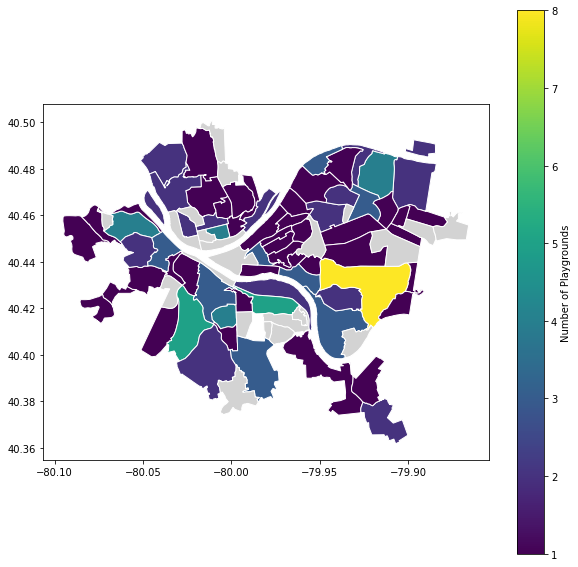

In [176]:
playgrounds_map.plot(column='quantity', # data to be used for shading
               cmap='viridis',              # color palette
               edgecolor="white",        # outline neighborhoods in white
               legend=True,              # show legend
               legend_kwds={'label': "Number of Playgrounds"}, # legend label
               figsize=(10, 10),         # legend size
               missing_kwds={"color": "lightgrey"} # neighborhoods with no data provided (or zero playgrounds) to gray
               )

As we can clearly see, Squirrel Hill South is the winner, containing the most playgrounds of any neighborhood in Pittsburgh. I used multiple data frames and graphs, and also and cut down the data to make this conclusion more comprehensible. The winner's success could be due to the fact that it is so large, or that it contains a large quantity of parks. Either way, in terms of quantity of playgrounds, Squirrel Hill South is the best neighborhood to raise a child. 

## Data Set Three - Crime Rates

Paula Brown and Abby Swan

 Here, we are determining which neighborhood is the safest neighborhood to raise a child. To determine this we are going to look at a data set that contains all the arrests in Pittsburgh and which neighborhood they correspond to. In addition, we are going to look at which individual arrests would be of greater threat to children.

In [123]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import geopandas

We import the data and display the first ten rows.

In [124]:
data = pd.read_csv("PittsburghPoliceArrestData.csv")

# look at the first ten rows of the data
data.head(10)

,PK,CCR,AGE,GENDER,RACE,ARRESTTIME,ARRESTLOCATION,OFFENSES,INCIDENTLOCATION,INCIDENTNEIGHBORHOOD,INCIDENTZONE,INCIDENTTRACT,COUNCIL_DISTRICT,PUBLIC_WORKS_DIVISION,X,Y
0,1975272,16158872,42.0,F,B,2016-08-24T12:20:00,"4700 Block Centre AV Pittsburgh, PA 15213",3929 Retail Theft.,"4700 Block Centre AV Pittsburgh, PA 15213",Bloomfield,5,804.0,8.0,2.0,-79.949277,40.452551
1,1974456,16144120,31.0,M,W,2016-08-03T14:55:00,"4200 Block Steubenville PKE Pittsburgh, PA 15205",13(a)(16) Possession of Controlled Substance,"4200 Block Steubenville PKE Pittsburgh, PA 15205",Outside City,OSC,5599.0,NaN,NaN,-80.088018,40.440136
2,1974466,16144165,63.0,F,B,2016-08-03T16:45:00,"900 Block Freeport RD Fox Chapel, PA 15238",3929 Retail Theft.,"900 Block Freeport RD Fox Chapel, PA 15238",Westwood,5,2811.0,9.0,2.0,-79.891803,40.486625
3,1974550,16145257,25.0,F,W,2016-08-05T02:36:00,"Foreland ST & Cedar AV Pittsburgh, PA 15212",5503 Disorderly Conduct. / 5505 Public Drunken...,"Foreland ST & Cedar AV Pittsburgh, PA 15212",East Allegheny,1,2304.0,1.0,1.0,-80.001939,40.454080
4,1974596,16145962,25.0,M,B,2016-08-06T02:00:00,"900 Block Woodlow ST Pittsburgh, PA 15205",2702 Aggravated Assault. / 2705 Recklessy Enda...,"900 Block Woodlow ST Pittsburgh, PA 15205",Crafton Heights,5,2814.0,2.0,5.0,-80.052204,40.445900
5,1974556,16144301,45.0,M,W,2016-08-15T13:30:00,"600 Block 1st AV Pittsburgh, PA 15219",3929 Retail Theft.,"800 Block Hazelwood AV Pittsburgh, PA 15217",Greenfield,4,1517.0,5.0,3.0,-79.929238,40.419699
6,1974628,16147655,29.0,M,W,2016-08-16T13:00:00,"2300 Block Pioneer AV Pittsburgh, PA 15226",2701 Simple Assault.,"2300 Block Pioneer AV Pittsburgh, PA 15226",Brookline,6,1919.0,4.0,5.0,-80.020357,40.400037
7,1974607,16146037,21.0,F,B,2016-08-16T04:25:00,"600 Block 1st AV Pittsburgh, PA 15219",2701 Simple Assault. / 5505 Public Drunkenness...,"700 Block S Braddock AV Pittsburgh, PA 15221",Regent Square,4,1410.0,NaN,NaN,-79.834462,40.398957
8,1974643,16132537,17.0,M,B,2016-08-29T17:55:00,"1400 Block Washington BL Pittsburgh, PA 15206",903 Criminal Conspiracy. / 3701 Robbery.,"N Euclid AV & Broad ST Pittsburgh, PA 15206",East Liberty,5,1115.0,NaN,NaN,0.000000,0.000000
9,1974647,16138646,14.0,M,B,2016-08-23T13:36:00,Zone 2,3127 Indecent Exposure. / 3123(a)(6) IDSI with...,Zone 5,NaN,5,NaN,NaN,NaN,NaN,NaN


Let's get a sum for each neighborhood of the amount of crimes that occured in them. Each row is one crime committed in a particular neighborhood. Therefore, if we count the number of rows that have a certain incident neighborhood, then we get the total crimes committed in that neighborhood. Then we can put the number of incidents and the neighborhoods they occured in (the index column) into a data frame.

In [125]:
data['INCIDENTNEIGHBORHOOD'].value_counts()
crime = pd.DataFrame() 
crime["incidents"] = data['INCIDENTNEIGHBORHOOD'].value_counts()
crime = crime.reset_index()
crime

,index,incidents
0,Central Business District,3312
1,South Side Flats,2840
2,Carrick,1957
3,East Allegheny,1770
4,Homewood South,1740
...,...,...
93,Regent Square,28
94,Central Northside,23
95,Mt. Oliver Boro,18
96,Troy Hill-Herrs Island,6


Let's plot this data!

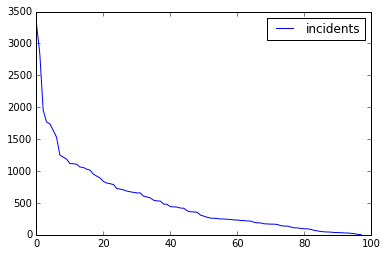

In [126]:
crime.plot()

Ew! The axis is hard to read! Let's make a bar graph instead of the original data!

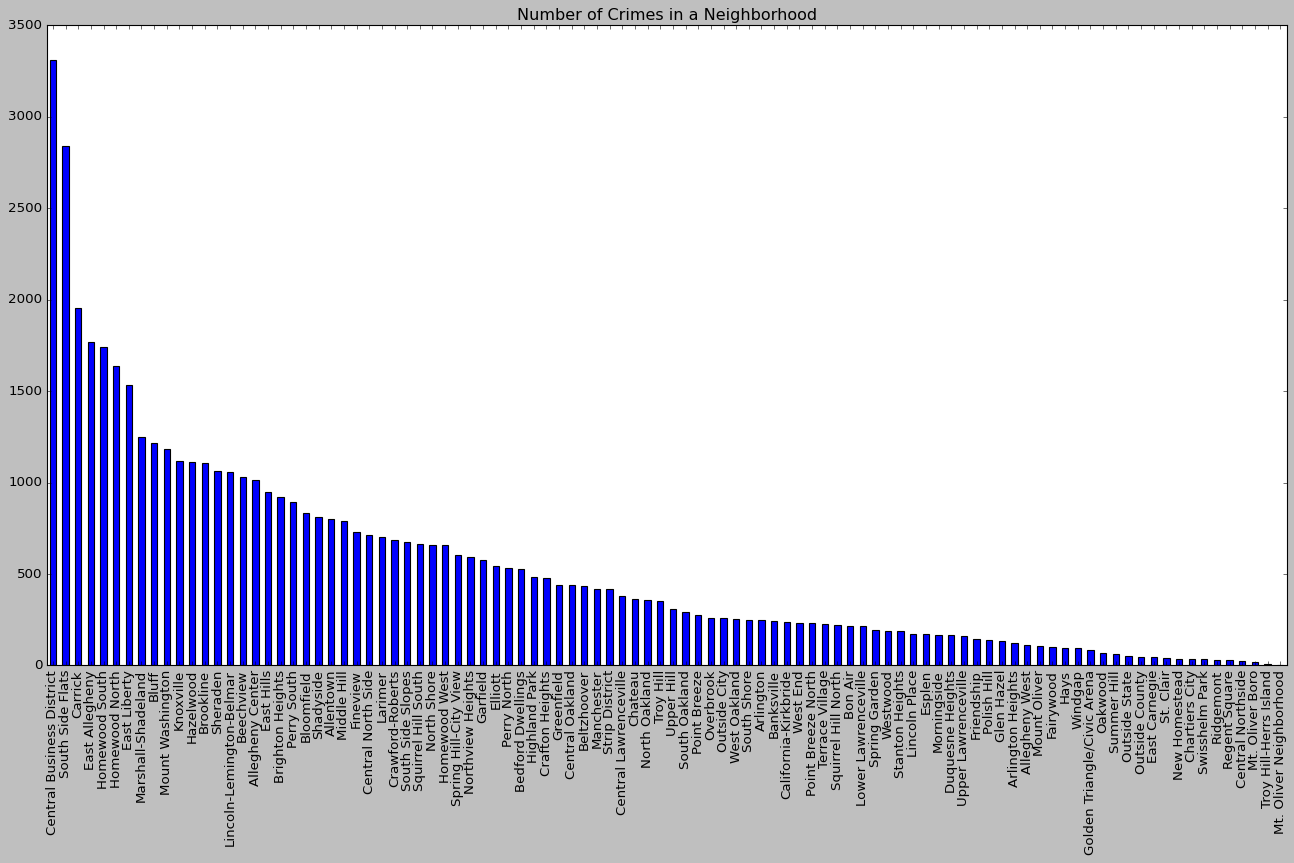

In [127]:
plt.style.use('classic')
data['INCIDENTNEIGHBORHOOD'].value_counts().plot.bar(title='Number of Crimes in a Neighborhood', figsize=(20,10))

This is a headache inducing bar graph, but it is legable. The neighborhoods with the most crime recorded was the Central Business District, South Side Flats, Carrick, East Allegheny, and Homewood South.
Now, let's try plotting this on a map.

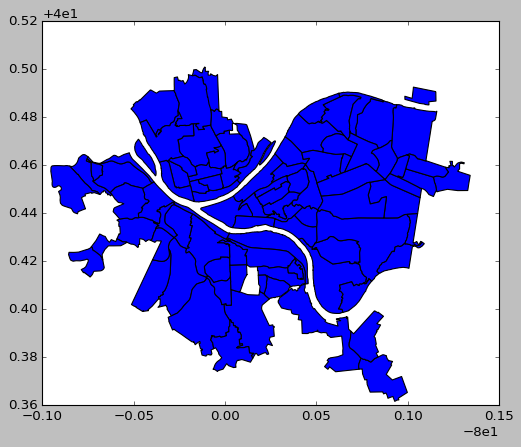

In [128]:
neighborhoods = geopandas.read_file("Neighborhoods/Neighborhoods_.shp")
neighborhoods.plot() # plot the geopandas dataframe


In [129]:
# do the merge
hood = neighborhoods.merge(crime, how='left', left_on='hood', right_on="index")
# look at the head to confirm it merged correctly
hood = hood.dropna()
hood[['hood',"incidents",'geometry']].head()

,hood,incidents,geometry
0,Central Oakland,438.0,"POLYGON ((-79.95304 40.44203, -79.95302 40.442..."
1,North Oakland,358.0,"POLYGON ((-79.95455 40.45882, -79.95427 40.458..."
2,West Oakland,255.0,"POLYGON ((-79.96230 40.44294, -79.96220 40.442..."
3,Crawford-Roberts,685.0,"POLYGON ((-79.98275 40.44641, -79.98273 40.446..."
4,Strip District,416.0,"POLYGON ((-79.97494 40.45629, -79.97484 40.456..."


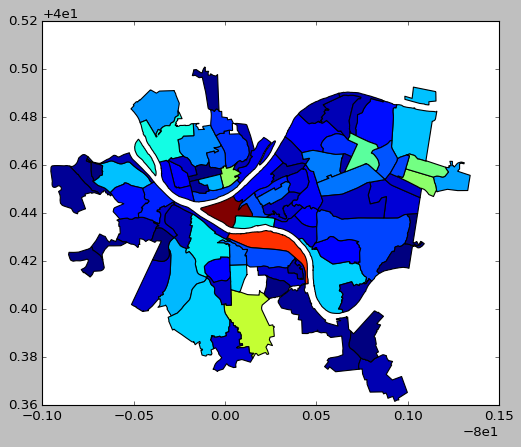

In [130]:
hood.plot(column="incidents")

We can improve this graph by adding a legend!

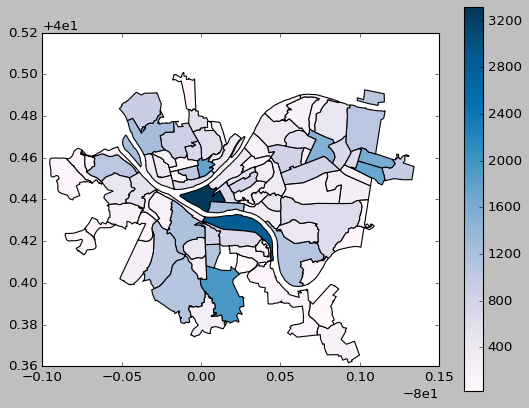

In [131]:
hood.plot(column='incidents', # set the data to be used for coloring
               cmap='PuBu', 
          legend= True# choose a color palette
 # set disctricts with no data to gray
               )

Above we can see where the most crime is present, but not all of this crime is a threat to children, so lets narrow the data set down to only crimes related to 'assault', 'child', and 'minor'

In [132]:
# Warning, this cell takes forever to run because the data set is massive
child_data = data

for index, row in data.iterrows():
    crime = str(row["OFFENSES"])

    if "minor" and "child" and "assault" not in crime.lower():
        child_data = child_data.drop(index)
    

In [133]:
child_data.sample(5)

,PK,CCR,AGE,GENDER,RACE,ARRESTTIME,ARRESTLOCATION,OFFENSES,INCIDENTLOCATION,INCIDENTNEIGHBORHOOD,INCIDENTZONE,INCIDENTTRACT,COUNCIL_DISTRICT,PUBLIC_WORKS_DIVISION,X,Y
17293,1996500,18015881,13.0,M,B,2018-01-26T13:00:00,"600 Block 1ST AV PITTSBURGH, PA 15219",2701(b)(1) Simple Assault - Fight or Scuffle E...,"1100 Block N MURTLAND ST PITTSBURGH, PA 15208",Homewood West,5,1207.0,9.0,2.0,-79.900142,40.460411
9737,1986826,17112237,41.0,M,B,2017-06-18T02:15:00,"1600 Block Lowrie ST Pittsburgh, PA 15212",2701 Simple Assault. / 5505 Public Drunkenness,"1600 Block Lowrie ST Pittsburgh, PA 15212",Troy Hill,1,2406.0,1.0,1.0,-79.983559,40.462743
42159,2028943,20129202,23.0,M,B,2020-07-31T01:00:00,"4700 Block Monongahela ST Pittsburgh, PA 15207",2701 Simple Assault. / 3502 Burglary.,"4700 Block Monongahela ST Pittsburgh, PA 15207",Hazelwood,4,1501.0,5.0,3.0,-79.943753,40.413499
53164,2044480,21019719,21.0,M,B,2022-01-18T09:45:00,Zone 2,3126 Indecent Assault. / 6301 Corruption of Mi...,Zone 6,NaN,6,NaN,NaN,NaN,NaN,NaN
7703,1984202,17073231,24.0,M,B,2017-04-23T02:59:00,"Saw Mill Run BL & Bausman ST Pittsburgh, PA 15226",903 Criminal Conspiracy. / 2702 Aggravated Ass...,"2200 Block Brownsville RD Pittsburgh, PA 15210",Carrick,3,2904.0,4.0,3.0,-79.986910,40.391177


We can then turn this new, more specified, data into a data frame that only contains number of incidents and the neighborhood in which they occured. We can do this by taking the value counts of the already existing data frame, much like we did earlier.

In [134]:
specific_crime = pd.DataFrame() 
specific_crime["incidents"] = child_data['INCIDENTNEIGHBORHOOD'].value_counts()
specific_crime = specific_crime.reset_index()
specific_crime.head()

,index,incidents
0,South Side Flats,661
1,Central Business District,657
2,Carrick,628
3,Marshall-Shadeland,468
4,Homewood North,444


Then graph this new and more specific data into a bar chart

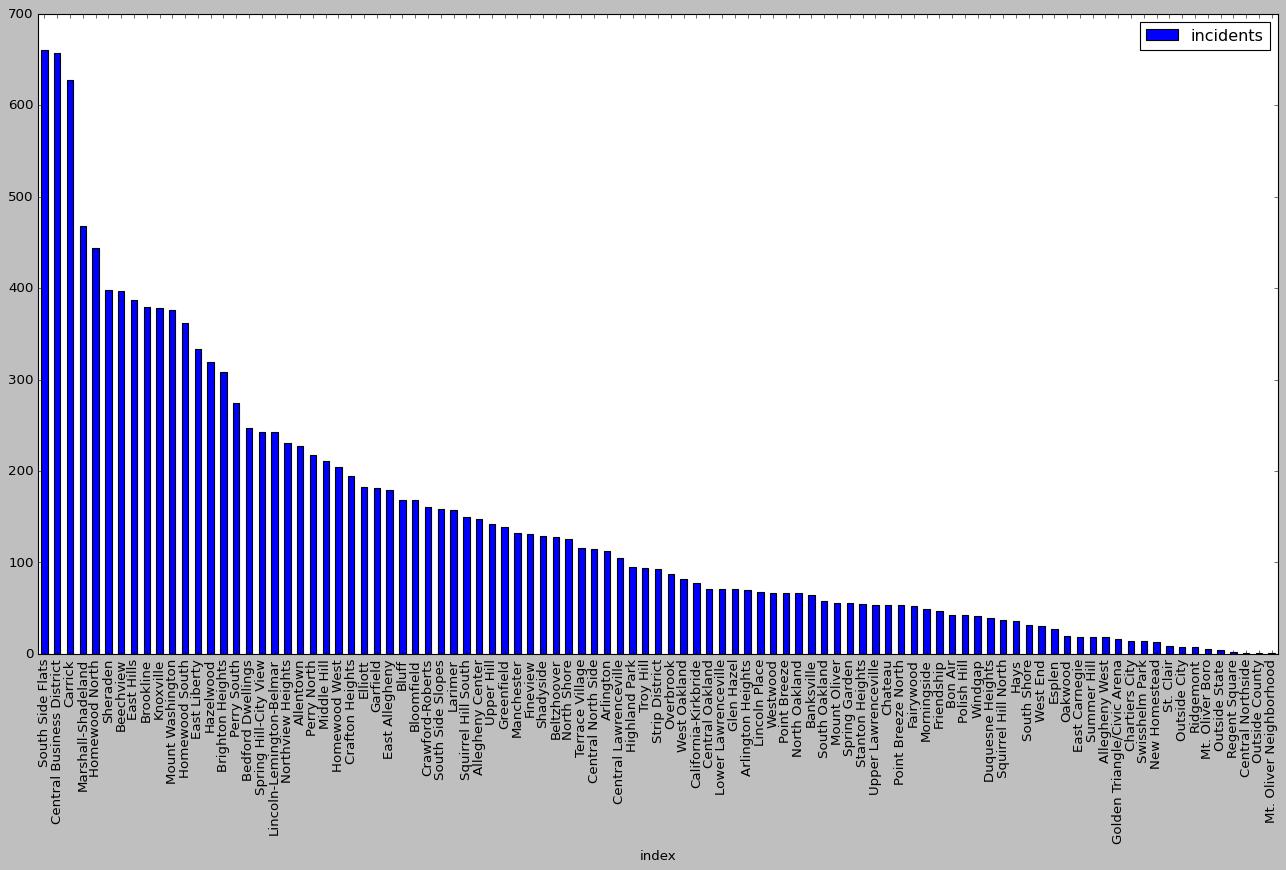

In [135]:
specific_crime.plot.bar(x = 'index', y='incidents', figsize=(20, 10))

We can see that there are three districts with higher child-related crime, but let's take this even further. Finally, I want to graph this data onto a map with geopandas! To do this, I will repeat a similar process as the mapping process above.

In [136]:
new_hood = neighborhoods.merge(specific_crime, how='left', left_on='hood', right_on="index")
new_hood = new_hood.dropna()
new_hood[['hood',"incidents",'geometry']].head()

,hood,incidents,geometry
0,Central Oakland,71.0,"POLYGON ((-79.95304 40.44203, -79.95302 40.442..."
1,North Oakland,67.0,"POLYGON ((-79.95455 40.45882, -79.95427 40.458..."
2,West Oakland,82.0,"POLYGON ((-79.96230 40.44294, -79.96220 40.442..."
3,Crawford-Roberts,161.0,"POLYGON ((-79.98275 40.44641, -79.98273 40.446..."
4,Strip District,93.0,"POLYGON ((-79.97494 40.45629, -79.97484 40.456..."


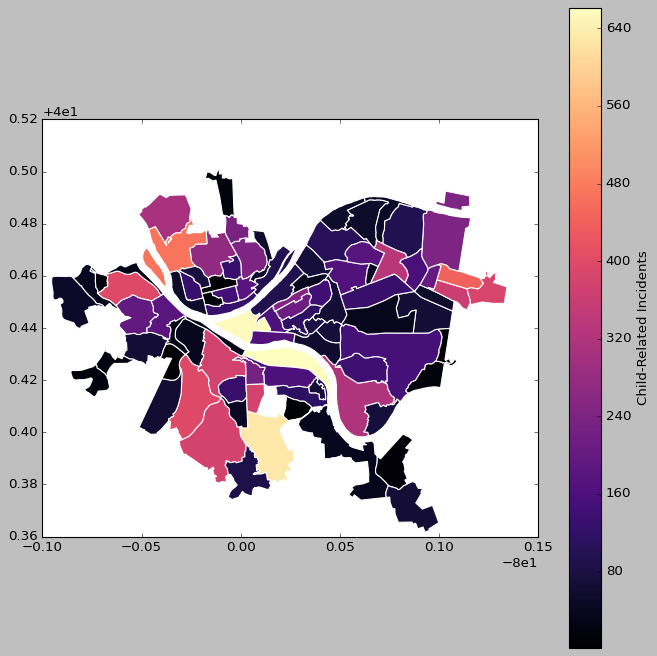

In [141]:
new_hood.plot(column='incidents', # data to be used for shading
               cmap='magma',              # color palette
               edgecolor="white",        # outline neighborhoods in white
               legend=True,              # show legend
               legend_kwds={'label': "Child-Related Incidents"}, # legend label
               figsize=(10, 10),         # legend size
               )

It looks as though South Side Flats, Central Business District, and Carrick are also leading with the most specific crime. Now just for comparison, lets plot the overall crime and child-related crimed next to eachother and compare them.

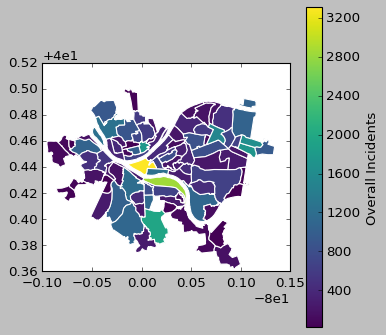

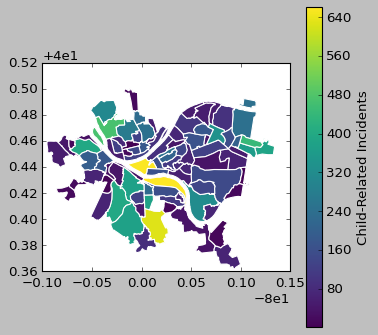

In [143]:
#Overall crime graph
hood.plot(column='incidents', # data to be used for shading
               cmap='viridis',              # color palette
               edgecolor="white",        # outline neighborhoods in white
               legend=True,              # show legend
               legend_kwds={'label': "Overall Incidents"}, # legend label
               figsize=(5, 5),         # legend size
               )


#Child-related crime graph
new_hood.plot(column='incidents', # data to be used for shading
               cmap='viridis',              # color palette
               edgecolor="white",        # outline neighborhoods in white
               legend=True,              # show legend
               legend_kwds={'label': "Child-Related Incidents"}, # legend label
               figsize=(5, 5),         # legend size
               )

Though the three leading neighborhoods are all still leading with crime, Carrick looks like it has a higher concentration of child-related crime than the other two leading neighborhoods.

In conclusion, the three neighborhoods that have a high amount of child related crime are South Side Flats, Central Business District, and Carrick, making these the worst places to raise a child in Pittsburgh in relation to criminal activity, making them the least safe. In addition, East Allegheny and Homewood South have a great amount of overall crime, not necessarily child-related crime. But it may be smart to avoid raising a child in these places as well, just to be safe. Many of the neighborhoods outside this list such as Ridgemont, Regent Squaren, Central Northside would be a very safe place to raise children.

## Conclusion

To compare the neighborhoods, we must compare the select few that soared ahead in the data, and was also included in each data set, meaning that there is information provided for each metric. To do this, we made each metric a ratio, as opposed to their raw numbers, whcih would make for an ugly and out of proportion graph

In [4]:
# Create arrays to represent the data
x = ['Squirrel Hill South', 'South Side Flats', 'Beechview', 'South Side Slopes', 'Alegheny Center', 
     'Highland Park', 'Sheraden','Beltzhoover']

y1 = np.array([2,4,3,3,2,4,2,3]) # Pool score
y2 = np.array([4,1,2.5,2.5,2,2,2,2]) # Playground scores
y3 = np.array([1.5,6.5,4,1.75,1.35,0.9,4,1.1]) # Crime scores

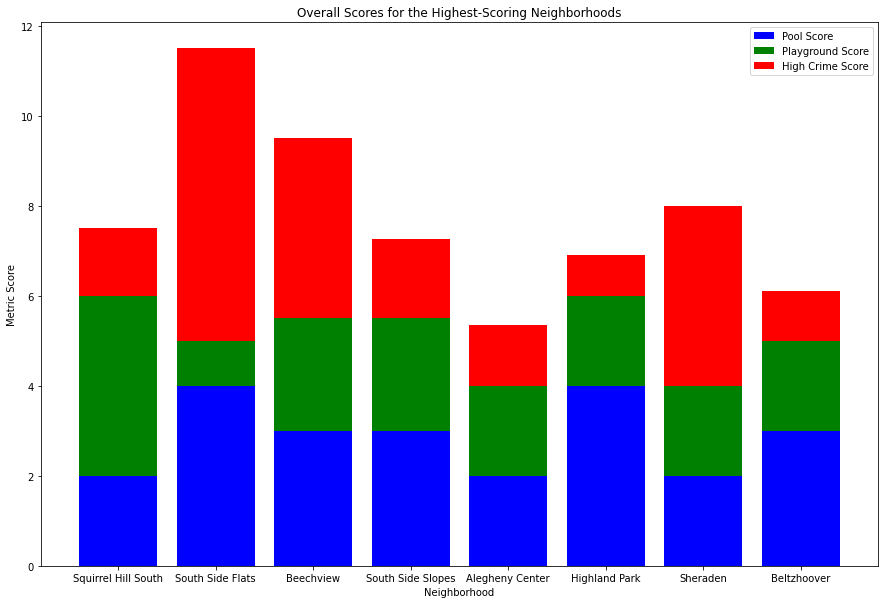

In [5]:
# Plot bars in stack manner
plt.figure(figsize=(15, 10))

plt.bar(x, y1, color='b')
plt.bar(x, y2, bottom=y1, color='g')
plt.bar(x, y3, bottom=y1+y2, color='r')

# Add labels and show the graph
plt.xlabel("Neighborhood")
plt.ylabel("Metric Score")
plt.legend([ "Pool Score", "Playground Score", "High Crime Score"])
plt.title("Overall Scores for the Highest-Scoring Neighborhoods")
plt.show()

Reminder that crime is BAD! and puctured in red. Also, pools are blue and playgrounds are green (it just makes sense that way).

As we can see here, Highland Park has the greatest amount of fun things with the lowest crime, making it the best neighborhoood to raise a child in!

To make this even more clear, we decided to create a metric that shows each factor in one bar. To do this, we created a list in which each value corresponds to a neighborhood. Each value pertains of the pool score as a positive number, the playground score as a positive number, and the crime score as a negative number. 

In [13]:
pool = [2,4,3,3,2,4,2,3] # Pool score
playground = [4,1,2.5,2.5,2,2,2,2] # Playground scores
crime = [1.5,6.5,4,1.75,1.35,0.9,4,1.1] # Crime scores

count = 0
total = list()

while count < len(pool):
    total.append(pool[count] + playground[count] - crime[count])
    count += 1

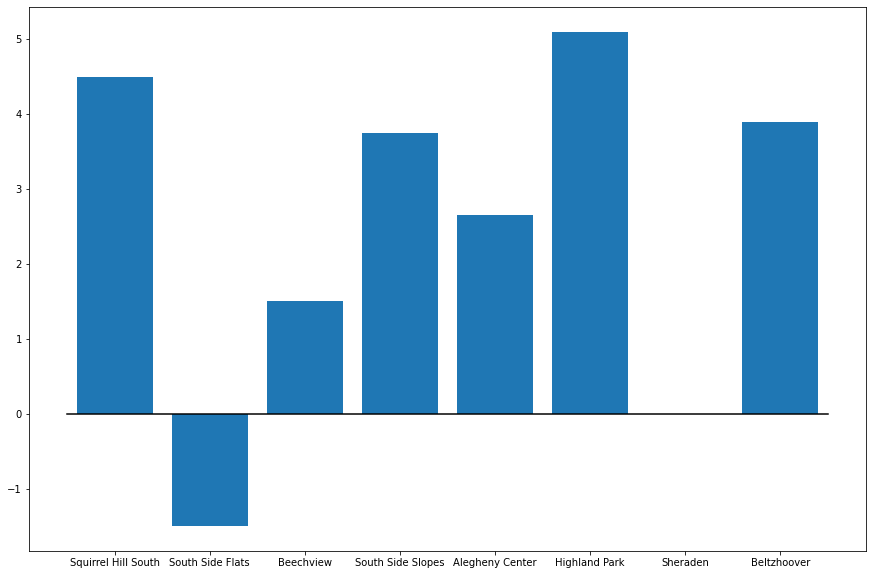

In [26]:
#Plotting the graph
plt.figure(figsize=(15,10))
plt.bar(x, total)
plt.plot([-0.5, 7.5], [0, 0], color='k')
plt.show()

Now we can REALLY see that Highland Park was the best neighborhood with Squirrel Hill South as a close second! In addition, Southside Flate is nearly to the worst, as the ecessive amount of crime drove its bar on the graph to be negative. 

### Paula's Conclusion:

My choice of best neighborhood is more weighed toward a low crime activity. A playground and pool are fantastic for children, but if children frequently get hurt in these public places, then is a slide really worth it? I’d personally rather grow up without a convenient pool than risk getting kidnapped. Therefore, I eliminated South Side Flats, for even though the neighborhood has two pools it also has a high crime rate that can involve children. For that same reason, Squirrel Hill South has the most playgrounds but has only one pool and was about halfway in crimes. So, I did not consider it the best neighborhood even though it had the most playgrounds because it had higher crime. Using this line of thinking, I say Highland Park is the best Pittsburgh neighborhood because it has two pools, four playgrounds, and (most importantly) has relatively lower crime. There are many neighborhoods that have less crime than Highland Park but none of them also have recorded playgrounds or pools. Even though crime is the most important factor of the three for me, I am still judging my answer based on low crime, pools, and playgrounds. Therefore, I must consider the number of playgrounds and pools in a neighborhood too. Out of all the neighborhoods listed as having pools and playgrounds, Highland Park has the least amount of potentially child-related crimes. Moreover, it has two pools (vs one or none at all like many neighborhoods) and four playgrounds (vs none like a lot of Pittsburgh neighborhoods).

### Abby's Conclusion:


After compiling all this data, it is important to compile and begin to relate the data. Each data set must work in favor of the metric. Though Squirrel Hill South leads in the number of playgrounds and has a pool, it is not a very safe area, which is very important. Though a pool and playground are fun, it is hard to enjoy such activities if parents and children feel unsafe at the scene of these activities. Because of this, I paid close attention to the crime metric. If a district was within the upper half of the dataset, I chose to discredit that neighborhood. For example, South Side Flats has a few playgrounds and is leading in terms of pools, but is also leading in crime. This leads me to completely discredit Southside Flats, as it is one of the most dangerous areas to live in Pittsburgh, and has a great amount of child-related crime. After assessing many of the other neighborhoods that were included in each metric, I came to the conclusion that Highland Park would be the best neighborhood to raise a child. It has four playgrounds, two pools, and a relatively low amount of crime. Though not at the top of the low crime or playground data, it is the best neighborhood that has a balanced quantity of fun activities and safety. 